# PREMISE

Near infra-red spectroscopy is a technique used in a number of industries, including food and agrochemical quality control. The goal is to determine a quantity of interest, for instance, protein content of milk, from spectrometer measurements.

More information: (https://en.wikipedia.org/wiki/Near-infrared_spectroscopy)

The data for this assignment consists of the following columns (in this particular order):

- Sample number.
- The quantity to predict.
- The rest of the columns are the spectral data.

**Your task:**

- Perform an exploratory analysis of the data.
- Develop a predictive model for the second column and report its accuracy in terms of R-squared and RMSE error.
- Explain your model.


# TL;DR

The complete code with explanations of the process can be found in the exploration.ipynb notebook
Explanations about the methodology used and qualitative explanations of the model can be found later in this document.

My solution consisted of 8 steps
1. Loading the data

2. Initial exploration of the target

3. Initial exploration of the features

4. Exploration of data transformation

5. Creation of a baseline model

6. Improvement to the baseline model
    
7. Final model development with Hyperparameter tunning\
    7.1-definition of candidates preprocessing pipelines\
    7.2-definition of hyperparameter ranges, target, and method\
    7.3-multiple model training\
    7.4-model performance analysis
    
8. Final results and conclusions\
    8.1 Error analysis\
    8.2 Feature Importance

#### 1. Loading the data
During data loading, I created a holdout set to evaluate model performance at the end of the process, 

#### 2. Initial exploration of the target
From analyzing the target variable I only highlight 4 distinctive peaks/groups of values. This would be something interesting to validate with domain experts. Also, it can be a good asset to validate possible weaknesses in the final model.

#### 3. Initial exploration of the features

The exploratory analysis of the data revealed consistent patterns across the different spectra:
Most of these patterns were analyzed visually, both using line plots and heatmaps.
Spectral data for similar products is particularly good to be analyzed visually, as the spectra maintain similar shapes. 

About data quality and cleaning,\
The data is complete in all its dimensions, so I moved forward with the assumption that this holds true for future inputs to the model.
 
 
#### 4. Exploration of data transformation

3 different transformations were successively applied to the dataset: 
* Scaling each row - Divide all values in each row by the median
* Normalising each column - Apply normal scalers to each column
* Diff the row - Measure change of value for contiguous wavelengths \

Combinations of these strategies are tested during the final model selection. But as part of the data analysis, each transformation allowed for the discovery of patterns in the data and their relation to the target variable.

#### 5. Creation of a baseline model

After understanding the data, I created a simple baseline model, using linear regression and no preprocessing. The goal of this step was to have a point of reference to start building on top, also to use the artifacts of the model (such as coefficients) to validate assumptions and build more understanding about the data
* rmse 1.589
* mae 1.216 
* r2 0.9938 
* perc_75_ape 8.091 
* perc_99_ape 37.29

#### 6. Improvement to the baseline model

Applying pre-processing the data results in more clear patterns in feature importance. But it does not improve the model performance.
The natural step after here would be to use this as a base for: 
- try regularisation and see the effects,
- do feature selection/engineering/dimensionality-reduction

#### 7. Final model development with Hyperparameter tunning
For this last modeling step, I performed hyperparameter optimization for xgboost models using bayesian optimization. I considered the pre-processing steps as part of the set of Hyperparameters. Also, the use or not of dimensionality reduction with PCA was included as a parameter.
The final result was a model that used the full "scale-normalise-diff" preprocessing pipeline, no dimensionallity reduction, and using these hyperparameters:

* gamma:            0.5453
* learning_rate:    0.1005
* max_depth:        14
* min_child_weight: 48.92
* n_estimators':    155
* subsample:        0.6966
 
The final performance over the validation set"
* rmse: 	   1.237
* mae: 		   0.8850
* r2: 		   0.9962
* perc_75_ape: 5.695
* perc_99_ape: 26.38

#### 8. Final results and conclusions
The final model's performance applied to the holdout set:
* rmse: 	   1.251
* mae: 		   0.8775
* r2: 		   0.9958
* perc_75_ape: 4.961
* perc_99_ape: 27.57

The final results did not show any noticeable pattern around the absolute error.
Only a few samples had remarkable high errors. An analysis of these cases is recommended, but it was not performed.

With a simple analysis of feature importance, I can see that only a few wavelengths have any impact on the final model. I recommend performing an analysis of the effect of noise on those bands to measure the impact it could have on the results.

# COMPILATION OF ASUMPTIONS AND OBSERVATIONS DURING EXPLORATION

As part of my Data-Science/Analytics workflow, I write my observations in an artifact while I'm doing the data exploration and model development. Said artifact accompanies the data product through its lifecycle.

This makes it easy to go back on version control and understand the assumptions that were made during this stage.

#### All of these will be found within the appropriate context on the exploration notebook. 
#### It is safe to skip this section

In [1]:
import dill as pickle
from pprint import pprint
knowledge_artifact = pickle.load(open('exploration_coments_artifact.pkl','rb'))

In [2]:
# list of asumptions generated during exploration
# here are presented in no particular order
[ print(e) for e in list(knowledge_artifact) if '[ASSUMPTION]' in e]
None


[ASSUMPTION]
as I do not have information on the overall population that was used to take these samples from, I will assume that a
 A random set will be representative of the universe
 

[ASSUMPTION]
The values represented in the columns are not %
This negates any expectation of values being <1


[OBSERVATION][ASSUMPTION]
the distribution of the target has 4 clearly defined groups, 
this might be useful  to search for specific patterns in these 4 groups
also, it might be helpful to see if the final model is weaker for some of these groups
The first group: (0-30) has the majority of the data
The other groups seem to be (30-45), (45-60), (60-)

[OBSERVATION][ASSUMPTION]
The ratio of rows/columns is low: (3908, 681)
if not treated properly it could result in overfitting

[ASSUMPTION] [DOMAIN]
the effects of specific chemical components on a NIR spectra, affect specific wavelengths, not the overall spectra.
Assuming we are looking for a set of specific components, analyzing how the deriva

In [3]:
# list of ideas/observations generated during exploration that are worth validating with DOMAIN knowldge
# here are presented in no particular order
[ print(e) for e in list(knowledge_artifact) if '[DOMAIN]' in e]
None


[DOMAIN] 
target variable seems to not have faulty data, 
this should be verified with a domain expert

[DOMAIN]
validate with domain expert if this behavior of having spectra that have the same shape but the different scale is normal for this type of data


[ASSUMPTION] [DOMAIN]
the effects of specific chemical components on a NIR spectra, affect specific wavelengths, not the overall spectra.
Assuming we are looking for a set of specific components, analyzing how the derivate(on wavelength) relates to the target might prove to be beneficial

[OBSERVATION][DOMAIN]
It is very clear from the final feature importance analysis
that there is a very small subset of the features (after pre-processing) that have an impact on the result.
based on this would be good to validate with a domain expert if those specific wavelengths are usually responsible for having an effect on our target value.
Also, this validates some of the initial explorations where the peaks seemed to be the points of most i

In [4]:
# list of OBSERVATIONS generated during exploration
# here are presented in no particular order
[ print(e) for e in list(knowledge_artifact) if '[OBSERVATION]' in e]
None


[OBSERVATION]
The most important features tend to belong to the bands (based on column index)
[37-43] band
[313-323] band
[486] spike
[501-516] band
[551] spike


[OBSERVATION]
There is almost no correlation between the target and the mean value per row.
I will not use the mean of the spectra for this analysis. 
But it could be a candidate to store as an extra feature.


[OBSERVATION]
there are several values in the training data that are greater than 1

[OBSERVATION][ASSUMPTION]
the distribution of the target has 4 clearly defined groups, 
this might be useful  to search for specific patterns in these 4 groups
also, it might be helpful to see if the final model is weaker for some of these groups
The first group: (0-30) has the majority of the data
The other groups seem to be (30-45), (45-60), (60-)

[OBSERVATION]
With the preprocessing,  and linear model
The overall performance did not improve, it actually decreased on the validation set.
on the other hand, the effect of different fe

# MODEL CHOICES AND DISCUSSION

### Data modeling

Spectral data represents the response of a light signal on a material.\
Simple chemical components have an effect in the absortion/reflectance of specific wavelengths.\
Complex chemical components are an aggregation of simple chemecal components.\
The measuring procedure has these factors to consider: 
* signal source
* environment
* material
* signal receptor

I will model everything that is not the material as "environment"\
I will model the material as a combination of chemical components.\
I will model target as a measure of the content of a chemical component in the material.

The effect of the environment can be multiple, but overall I will split it in "band" effects and "spectra" effects. For lack of information about the environment I will not model "band" effects.

Asuming a similar chemical composition, 2 materials should have a similar spectra. 

Because of the observed difference on scale of different spectra with similar "target", My asumption is that the difference in scale is an effect of the environment. I will model it as such. This makes the "scale" would be a factor to filter out.

### Initial linear model

The chaice to start with a simple linear model is to set a baseline for performance.
The expected outcome is a benchmark to compare future models against, and to validate asumptions about feature importance.

Linear models are very "transparent" and explainable, starting with this can give good insights on the dataset.

With this model we acheived better performance than expected:
* rmse 1.589
* r2 0.9938

but, unsurprisingly,  when we see the values of coefficients, we notice that there arebands of higher importance, but overall the model seems to be trying to overfit.

In [5]:
from IPython.display import Image
Image(filename='images/lm_importance.png')
#x-axis: column index
#y-axis: coefficient

The model seems to be finding some interesting information in certain specific wavelengths, but its trying to negate high positive coeffiecnts with high negative coefficients of adjacent wavelenthgs. 

When trying some pre-rocessing by scaling,normalizing and derivating the spectra information we expect to see more clear patterns captured by the model

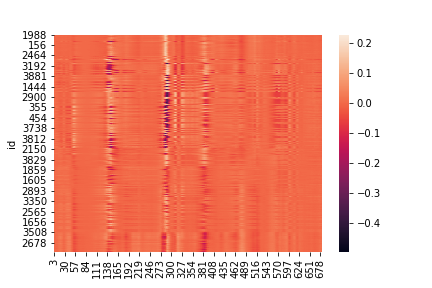

In [6]:
from IPython.display import Image
Image(filename='images/heatmap_derivate.png')
#x-axis: column index
#y-axis: sample_id, sorted by target value ascending 
#color: value of the derivate (after scaling-normalising)

In [7]:
from IPython.display import Image
Image(filename='images/lm_preprocessed_importance.png')
#x-axis: column index
#y-axis: coefficient

This model has worst performance, but it find better patterns around the data. It still suffers from not having a regularization process.
* rmse  1.667
* r2 0.9932


### Dimensionallity reduction

Dimensionallity reduction seems to be an obious choice for such a wide dataset. Specially in a dataset like this that has high correlation between most of its columns.

For lack of time I did not explore several different options. 
I chose to add a simple PCA with an expected explained variance of 99.9%. 

The PCA model acheived the desired exaplained variance within the first 10-15 components.

The final best perfomant models did not contain the dimensionallity reduction. I suspect this is due the impact that small changes in certain wavelenghts have in the final result.

Potential improvements to this process:
- Cluster analysis on the reduced space, this might find groups of beheavour that might be worth to model separatelly
- Dimensionallity reduction by local PCA
- Dimensionallity reduction by feature selection
- Dimensionallity reduction by domain knowldge identifying expected important wavelenghts for the problem

### Hyperparameter selection 
#### Bayesian optimisation 

For hyperparameter optimisation I decided to go with Bayesian optimisation: it is overall more effective than grid search and random search. (as in number of steps needed)

Also, for this particular problem the training times are low enough that parallelising the optimization process is not needed, but its not fast enough that we can expect to randomly explore the whole hyperparameter space and abotain good performance in a reasonable amount of time.

For "heavier" problems this method have some limitations: both because it is not straightforward to paralellise, and also it requires to fully train the model on each iteration, meaning that early stopping would not be possible (or out of the box).

### Gradient boosting tree

Tree models are particularly good with structured data, they try to find patterns on a column by column basis, And this is particularlly good when we expect specific sets of columns to pack important patterns in the data. Which is the case based on our data model.

Also, we are considering that extrapolating will not be a need of the model. Tree models are not the best at extrapolating.

Aside from that, xgboost is recognised to be a high performing model for regression problems for tabular data. 

To train the model there are 7 parameters that I considered:
* **n_estimators**: Number of weak learners used\
The more of this the more likelly we will get good performance, but it could end up on overfitting to the training data

* **learning_rate**: weight update shrinkage
It makes the model more robust, tries to prevent overfitting by "slowing down" the learning. There is a tradeoff on performance/overfitting/speed

* **gamma**:  loss reduction required for leaf partition
The larger it is, the more conservative the model will be.

* **max_depth**: Maximum depth of a tree
Increasing this value will make the model more complex and more likely to overfit

* **min_child_weight**: restriction for number of elements in final leafs
The lesser the number the more caple of overfitting is the model.

* **subsample**: rate of data from training added to the next step
The closer to one, the more data it is used. 1 means that all training data is used in every tree, this brings the danger of overfitting

* **preprocessing_method**: What of the presented data processing methods will be used


## The final model:
60+ models were evaluated, with several different performances

* gamma:            0.5453
* learning_rate:    0.1005
* max_depth:        14
* min_child_weight: 48.92
* n_estimators':    155
* subsample:        0.6966
* preprocessing_method: normalization_derivate

The final performance was a considerable improvement over the previous models. 

At this stage, in case we wanted to keep improving the model we could do a grid/random search around these hyper parameters. I would advise to try to improve on variance error by focusing on n_estimators and max_depth.

Also in case that the calibration process needs to be repeated often, I would do an analysis of performance vs training set size.  This is to minimise cost and effort of obtaining data for future calibration efforts.